## Problema del viajante

Resolver el problema del viajante utilizando algoritmos genéticos. 

- ¿Es posible aproximarse al resultado?

## Codificación

- Definir como se codificará el problema

- San Rafael X1
- El Nihuil X2
- El sosneado X3
- Villa Atuel X4
- Jaime Prats X5
- Las Malvinas X6
- Salto de las Rosas X7
- Rama caída X8
- Monte Coman X9
- Gral. Alvear X10
- Rincón del Atuel X11

Ciudades = 11
N = 10

In [33]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import itertools

## Adaptación

- Definir como se calculará la adaptación de un individuo
- ¿Existen estados que deben ser penalizados?


In [34]:
kms = [
    [0, 72.7, 137, 59.1, 70.1, 36.6, 18.9, 8.7, 50.7, 84.8, 37.6],
    [72.7, 0, 107.8, 108, 120, 135, 97.4, 84, 69.7, 122, 35],
    [137, 108, 0, 184, 200, 162, 148, 134, 186, 214, 99.1],
    [54.3, 120, 184, 0, 16.7, 45.2, 35.6, 54.5, 47.1, 31.4, 84.7], 
    [70.1, 136, 200, 16.9, 0, 60.8, 51.3, 70.2, 41.2, 15, 64.6], 
    [36, 97.7, 162, 45.6, 60.8, 0, 18.8, 29.7, 57.8, 75.4, 62.6], 
    [18.7, 84.2, 148, 36, 51.2, 18.8, 0, 18.9, 43, 65.8, 49.1], 
    [8.7, 69.8, 134, 54.9, 73.5, 29.6, 18.8, 0, 56.4, 84.7, 34.7], 
    [50.5, 122, 186, 47.2, 41.3, 52.8, 43, 56.3, 0, 48, 86.5], 
    [84.8, 122, 214, 31.4, 15, 75.4, 65.8, 84.7, 48, 0, 115], 
    [37.6, 35.2, 99.1, 85.1, 100, 62.5, 49.1, 34.7, 86.6, 115, 0]
]

cities = [
    "San Rafael",
    "El Nihuil",
    "El sosneado",
    "Villa Atuel",
    "Jaime Prats",
    "Las Malvinas",
    "Salto de las Rosas",
    "Rama caída",
    "Monte Coman",
    "General Alvear",
    "Rincón del Atuel"
]


In [35]:
def adaptation_function(population):
    fitness = []
    for pop in population:
        summ = 0
        summ += kms[0][cities.index(pop[0])] # Agregamos San Rafael a la primer ciudad
        for v, w in zip(pop[:-1],pop[1:]):
            summ += kms[cities.index(v)][cities.index(w)]
        summ += kms[0][cities.index(pop[-1])] # Agregamos la ultima ciudad a San Rafael
        fitness.append(-summ)
        
    return fitness


## Selección por torneo

In [36]:
from copy import deepcopy

def tournament(fitness, population):
    parents = []
    fitness_copy = deepcopy(fitness)
    fitness_aux = deepcopy(fitness)
    
    while len(fitness_aux) > 0: 
        selection1,selection2 = np.random.choice(fitness_aux,size = 2, replace = False) # np.random.choice
 
            
        if selection1 > selection2:
            parents.append(population[fitness_copy.index(selection1)])
            fitness_aux.remove(selection1)
            fitness_aux.remove(selection2)

        elif selection1 < selection2:
            parents.append(population[fitness_copy.index(selection2)])
            fitness_aux.remove(selection1)
            fitness_aux.remove(selection2)
        else:
            random_selection = random.choice([selection1, selection2]) # elegimos uno al azar en caso de que sean iguales
            parents.append(population[fitness_copy.index(random_selection)])
            fitness_aux.remove(selection1)
            fitness_aux.remove(selection2)

    return parents




## Cruza

In [37]:
def crosses(parents):
    childs = list()
    merge = list(zip(parents,parents[1:]))[::2]
    
    split = np.random.choice(10 - 1, random.randint(1, 9) - 1, replace=False) + 1
    split.sort()
    
    for parents1, parents2 in merge:
        child_one, child_two = list(), list()
        parents_one, parents_two = np.split(parents1, split), np.split(parents2, split)
        parents_one_size = len(parents_one)
        add_parents = False
        for num in range(parents_one_size):
            if add_parents:
                child_one.append(parents_two[num])
                child_two.append(parents_one[num])
                add_parents = False
            else:
                child_one.append(parents_one[num])
                child_two.append(parents_two[num])
                add_parents = True
        
    
        childs.append(list(itertools.chain.from_iterable(child_one)))
        childs.append(list(itertools.chain.from_iterable(child_two)))
    return childs


## Mutación

#### Aplicamos la mutación de bit

In [38]:
def crosses(parents):
    childs = list()
    merge = list(zip(parents,parents[1:]))[::2]
    
    split = np.random.choice(10 - 1, random.randint(1, 9) - 1, replace=False) + 1
    split.sort()
    
    for parents1, parents2 in merge:
        child_one, child_two = list(), list()
        parents_one, parents_two = np.split(parents1, split), np.split(parents2, split)
        parents_one_size = len(parents_one)
        add_parents = False
        for num in range(parents_one_size):
            if add_parents:
                child_one.append(parents_two[num])
                child_two.append(parents_one[num])
                add_parents = False
            else:
                child_one.append(parents_one[num])
                child_two.append(parents_two[num])
                add_parents = True
        
    
        childs.append(list(itertools.chain.from_iterable(child_one)))
        childs.append(list(itertools.chain.from_iterable(child_two)))
    return childs



# Algoritmo

In [39]:
def create_population(size_pop):
    cities_gen = [
    "El Nihuil",
    "El sosneado",
    "Villa Atuel",
    "Jaime Prats",
    "Las Malvinas",
    "Salto de las Rosas",
    "Rama caída",
    "Monte Coman",
    "General Alvear",
    "Rincón del Atuel"
    ]
    population = []
    for i in range(size_pop):
        population.append(list(np.random.choice(cities_gen,replace=False,size=10)))
    return population
if __name__ == "__main__":
    population = create_population(60)
    best_adaptation = []
    generation = []
    for i in range(100):
        fitness = adaptation_function(population)
        best_adaptation.append(max(fitness))
        generation.append(i)
        selected_parents = tournament(fitness, population)
        childrens = crosses(selected_parents)
        childrens = mutation(childrens)
        selected_parents.extend(childrens)
        population = selected_parents
        


# Gráfico

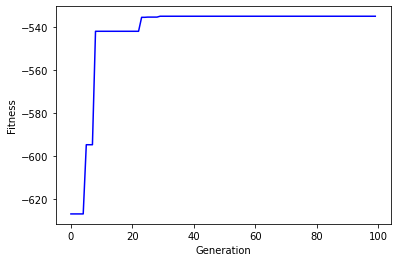

In [40]:
fig, ax = plt.subplots()
ax.plot(generation, best_adaptation, 'b')
ax.set_ylabel('Fitness')
ax.set_xlabel('Generation')
plt.show()

# ¿Es posible aproximarse al resultado?
#### No es posible acercarse al resultado tal y como está resuelto el ejercicio debido a que no existe variabilidad en la población que se va generando. Esto nos da una falsa percepción de mejora del algoritmo, dado que se obtienen valores de adaptabilidad iguales en las primeras iteraciones.